In [89]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
# Create a directed graph
G = nx.DiGraph()

In [90]:
table_1_classes_schedules = pd.read_csv("data/classes_schedules.csv")

table_1_classes_schedules.head()

,class_id,class_name,subject,teacher_name,teacher_id,teacher_email,room_number,building,class_time,duration_minutes,max_students,enrolled_students,grade_level,semester,academic_year,class_description,prerequisites,textbook_required,supply_list
0,C001,Advanced Mathematics 9A,Mathematics,Mrs. Sarah Johnson,T001,s.johnson@greenfield.edu,Room 201,Main Building,08:00 AM - 08:50 AM,50,30,28,9,Fall,2024,Advanced algebra and geometry concepts,Pre-Algebra with B+ or higher,"Algebra 1 Textbook, Calculator","Calculator, Ruler, Compass"
1,C002,English Literature 10B,English,Mr. David Brown,T002,d.brown@greenfield.edu,Room 105,Main Building,09:00 AM - 09:50 AM,50,25,24,10,Fall,2024,Study of classic and modern literature,English 9 passed,Literature Anthology,"Notebook, Pens"
2,C003,Biology 8C,Science,Ms. Jennifer Davis,T003,j.davis@greenfield.edu,Room 301,Science Building,10:00 AM - 10:50 AM,50,20,19,8,Fall,2024,Introduction to biological sciences,NaN,Biology Today,"Lab coat, Safety goggles"
3,C004,AP History 11A,History,Dr. Robert Miller,T004,r.miller@greenfield.edu,Room 110,Main Building,11:00 AM - 11:50 AM,50,25,23,11,Fall,2024,Advanced Placement World History,History 10 with A- or higher,AP World History,"Highlighters, Index cards"
4,C005,Geometry 9B,Mathematics,Mrs. Sarah Johnson,T001,s.johnson@greenfield.edu,Room 201,Main Building,01:00 PM - 01:50 PM,50,30,26,9,Fall,2024,Geometric principles and proofs,Algebra 1 completed,Geometry Textbook,"Compass, Protractor"


In [91]:

# add nodes
G.add_node('class', type='Class', attributes=["class_id", "class_name", "class_description"])
G.add_node('teacher', type='Teacher', attributes=["teacher_id", "teacher_name", "teacher_email"])
G.add_node('location', type='Location', attributes=["building", "room_number"])
G.add_node('schedule', type='Schedule', attributes=["class_time", "duration_minutes"])
G.add_node('prerequisite', type='Prerequisite', attributes=["prerequisites", "textbood_required", "supply_list"])
G.add_node('class_info', type='ClassInfo', attributes=["max_students", "enrolled_students", "academic_year", "semester", "grade_level"])


# Add edges defining relationships
G.add_edge('teacher', 'class', label='TEACHES', attributes=['teacher_id'])
G.add_edge('class', 'location', label='LOCATED_AT', attributes=['class_id'])
G.add_edge('class', 'schedule', label='HAS_SCHEDULE', attributes=['class_id'])
G.add_edge('class', 'prerequisite', label='HAS_PREREQUISITE', attributes=['class_id'])
G.add_edge('class', 'class_info', label='HAS_CLASS_INFO', attributes=['class_id'])

In [92]:
table_2_grades_assignments = pd.read_csv("data/grades_assignments.csv")

table_2_grades_assignments.head()

,assignment_id,student_id,student_name,class_id,class_name,teacher_name,assignment_name,assignment_type,due_date,submission_date,points_possible,points_earned,percentage,letter_grade,late_penalty,comments,subject,grade_level,semester,academic_year,weight_category,rubric_score
0,A001,1001,John Michael Smith,C001,Advanced Mathematics 9A,Mrs. Sarah Johnson,Chapter 5 Quiz,Quiz,2024-09-15,2024-09-15,50,42,84,B,NaN,Good understanding of concepts,Mathematics,9,Fall,2024,Quizzes,84
1,A002,1001,John Michael Smith,C001,Advanced Mathematics 9A,Mrs. Sarah Johnson,Homework Set 12,Homework,2024-09-20,2024-09-21,20,18,90,A-,1 point deducted,Late submission,Mathematics,9,Fall,2024,Homework,90
2,A003,1002,Emma Rose Wilson,C002,English Literature 10B,Mr. David Brown,Essay: Character Analysis,Essay,2024-10-01,2024-09-30,100,95,95,A,NaN,Excellent analysis and writing,English,10,Fall,2024,Essays,95
3,A004,1002,Emma Rose Wilson,C002,English Literature 10B,Mr. David Brown,Vocabulary Test 3,Test,2024-09-25,2024-09-25,30,29,97,A+,NaN,Perfect understanding,English,10,Fall,2024,Tests,97
4,A005,1003,Michael Johnson,C003,Biology 8C,Ms. Jennifer Davis,Lab Report: Cell Structure,Lab Report,2024-09-28,2024-09-30,75,60,80,B-,3 points deducted,"Good observations, needs better conclusions",Science,8,Fall,2024,Lab Reports,80


In [93]:
# add nodes for table 2

G.add_node('student', type='Student', attributes=["student_id", "student_name", "student_email"])
G.add_node('assignment', type='Assignment', attributes=["assignment_id", "assignment_name", "assignment_type", "subject", "due_date", "submission_date"])
G.add_node('grade', type='Grade', attributes=["points_earned", "letter_grade", "percentage", "late_penalty"])
G.add_node('subject', type='Subject', attributes=["subject"])

# Add edges defining relationships for table 2
G.add_edge('student', 'class', label='ENROLLED_IN', attributes=['student_id'])
G.add_edge('class', 'assignment', label='HAS_ASSIGNMENT', attributes=['class_id'])
G.add_edge('assignment', 'student', label='SUBMITTED_BY', attributes=['assignment_id'])
G.add_edge('assignment', 'subject', label='BELONGS_TO', attributes=['assignment_id'])
G.add_edge('student', 'grade', label='RECEIVED_ON', attributes=['student_id'])
G.add_edge('teacher', 'subject', label='TEACHES_SUBJECT', attributes=['teacher_id'])


In [94]:
table_3_student_information = pd.read_csv("data/student_information.csv")

table_3_student_information.head()

,student_id,full_name,first_name,last_name,age,grade,class_section,teacher_name,teacher_email,school_name,school_address,parent_name,parent_phone,parent_email,enrollment_date,fees_paid,total_fees,subject_grades,attendance_percentage,notes
0,1001,John Michael Smith,John,Smith,14,9,9A,Mrs. Sarah Johnson,s.johnson@greenfield.edu,Greenfield High School,"123 Oak Street, Springfield, IL 62701",Robert Smith,555-0123,r.smith@email.com,2023-08-15,750,1000,"Math:B+,English:A-,Science:B,History:C+",85.5,"Good student, needs help in history"
1,1002,Emma Rose Wilson,Emma,Wilson,15,10,10B,Mr. David Brown,d.brown@greenfield.edu,Greenfield High School,"123 Oak Street, Springfield, IL 62701",Lisa Wilson,555-0456,lisa.wilson@gmail.com,2022-08-20,1000,1000,"Math:A,English:A+,Science:A-,History:B+",92.3,Excellent performance
2,1003,Michael Johnson,Michael,Johnson,13,8,8C,Ms. Jennifer Davis,j.davis@greenfield.edu,Greenfield High School,"123 Oak Street, Springfield, IL 62701",David Johnson,(555) 789-0123,d.johnson@yahoo.com,2024-01-10,400,1200,"Math:C,English:B-,Science:C+,History:D+",78.2,"Transferred mid-year, catching up"
3,1004,Sarah Elizabeth Brown,Sarah,Brown,16,11,11A,Dr. Robert Miller,r.miller@greenfield.edu,Greenfield High School,"123 Oak Street, Springfield, IL 62701",Jennifer Brown,555.789.4567,jbrown@outlook.com,2021-08-18,1200,1200,"Math:A+,English:A,Science:A+,History:A-",96.8,Honor roll student
4,1005,James Wilson,James,Wilson,14,9,9B,Mrs. Sarah Johnson,s.johnson@greenfield.edu,Greenfield High School,"123 Oak Street, Springfield, IL 62701",Mark Wilson,555-0789,mark.w@email.com,2023-08-15,650,1000,"Math:B-,English:C+,Science:B,History:C",82.1,Needs improvement in English


In [95]:
# add nodes for table 3
G.add_node('parent', type='Parent', attributes=["parent_id", "parent_name", "parent_email"])
G.add_node('student_info', type='StudentInfo', attributes=["full_name", "last_name", "age", "enrollment_date", "class_section", "grade", "attendance_percentage"])
G.add_node('student_fees', type='StudentFees', attributes=["fees_paid", "total_fees"])
G.add_node('school', type='School', attributes=["school_name", "school_address"])

# Add edges defining relationships for table 3
G.add_edge('student', 'student_info', label='HAS_INFO', attributes=['student_id'])
G.add_edge('student', 'parent', label='HAS_PARENT', attributes=['student_id'])
G.add_edge('student', 'student_fees', label='HAS_FEES', attributes=['student_id'])
G.add_edge('school', 'class', label='OFFERED_BY', attributes=['school_name'])


In [96]:
# Custom function to draw multi-formatted text
def draw_formatted_node_label(ax, x, y, node_name, node_type, attributes):
    # Calculate text positioning
    line_height = 0.08
    current_y = y + 0.08
    
    # Draw node name (bold and larger)
    ax.text(x, current_y, node_name, fontsize=12, fontweight='bold', 
            ha='center', va='center', color='darkblue')
    
    current_y -= line_height
    
    # # Draw node type (medium size, semi-bold)
    # ax.text(x, current_y, f"({node_type})", fontsize=10, fontweight='normal', 
    #         ha='center', va='center', color='darkgreen', style='italic')
    
    current_y -= line_height * 0.3
    
    # Draw attributes (smaller, normal weight)
    if attributes:
        # Group attributes in pairs for better readability
        attr_lines = []
        for i in range(0, len(attributes), 2):
            if i + 1 < len(attributes):
                attr_lines.append(f"{attributes[i]}, {attributes[i+1]}")
            else:
                attr_lines.append(attributes[i])
        
        for attr_line in attr_lines:
            ax.text(x, current_y, attr_line, fontsize=8, fontweight='normal', 
                    ha='center', va='center', color='black')
            current_y -= line_height * 0.3

In [97]:
def draw_formatted_edge_labels(ax, G, pos):
    for edge in G.edges():
        # Get edge data
        edge_data = G.edges[edge]
        
        # Calculate edge midpoint
        x1, y1 = pos[edge[0]]
        x2, y2 = pos[edge[1]]
        x_mid = (x1 + x2) / 2
        y_mid = (y1 + y2) / 2
        
        # Prepare edge label text
        label_parts = []
        
        # Add main label if it exists
        if 'label' in edge_data:
            label_parts.append(edge_data['label'])
        
        # Add other attributes (excluding 'label')
        edge_attributes = []
        for key, value in edge_data.items():
            if key != 'label':
                edge_attributes.append(f"{value}")
        
        # Combine label and attributes
        if label_parts:
            main_label = label_parts[0]
        else:
            main_label = ""
        
        # Draw main label (relationship name)
        if main_label:
            ax.text(x_mid, y_mid + 0.002, main_label, fontsize=8, fontweight='bold', 
                    ha='center', va='center', color='red')
        
        # Draw edge attributes below the main label
        if edge_attributes:
            attr_text = '\n'.join(edge_attributes)
            ax.text(x_mid, y_mid - 0.03, attr_text, fontsize=6, fontweight='normal', 
                    ha='center', va='center', color='darkred')

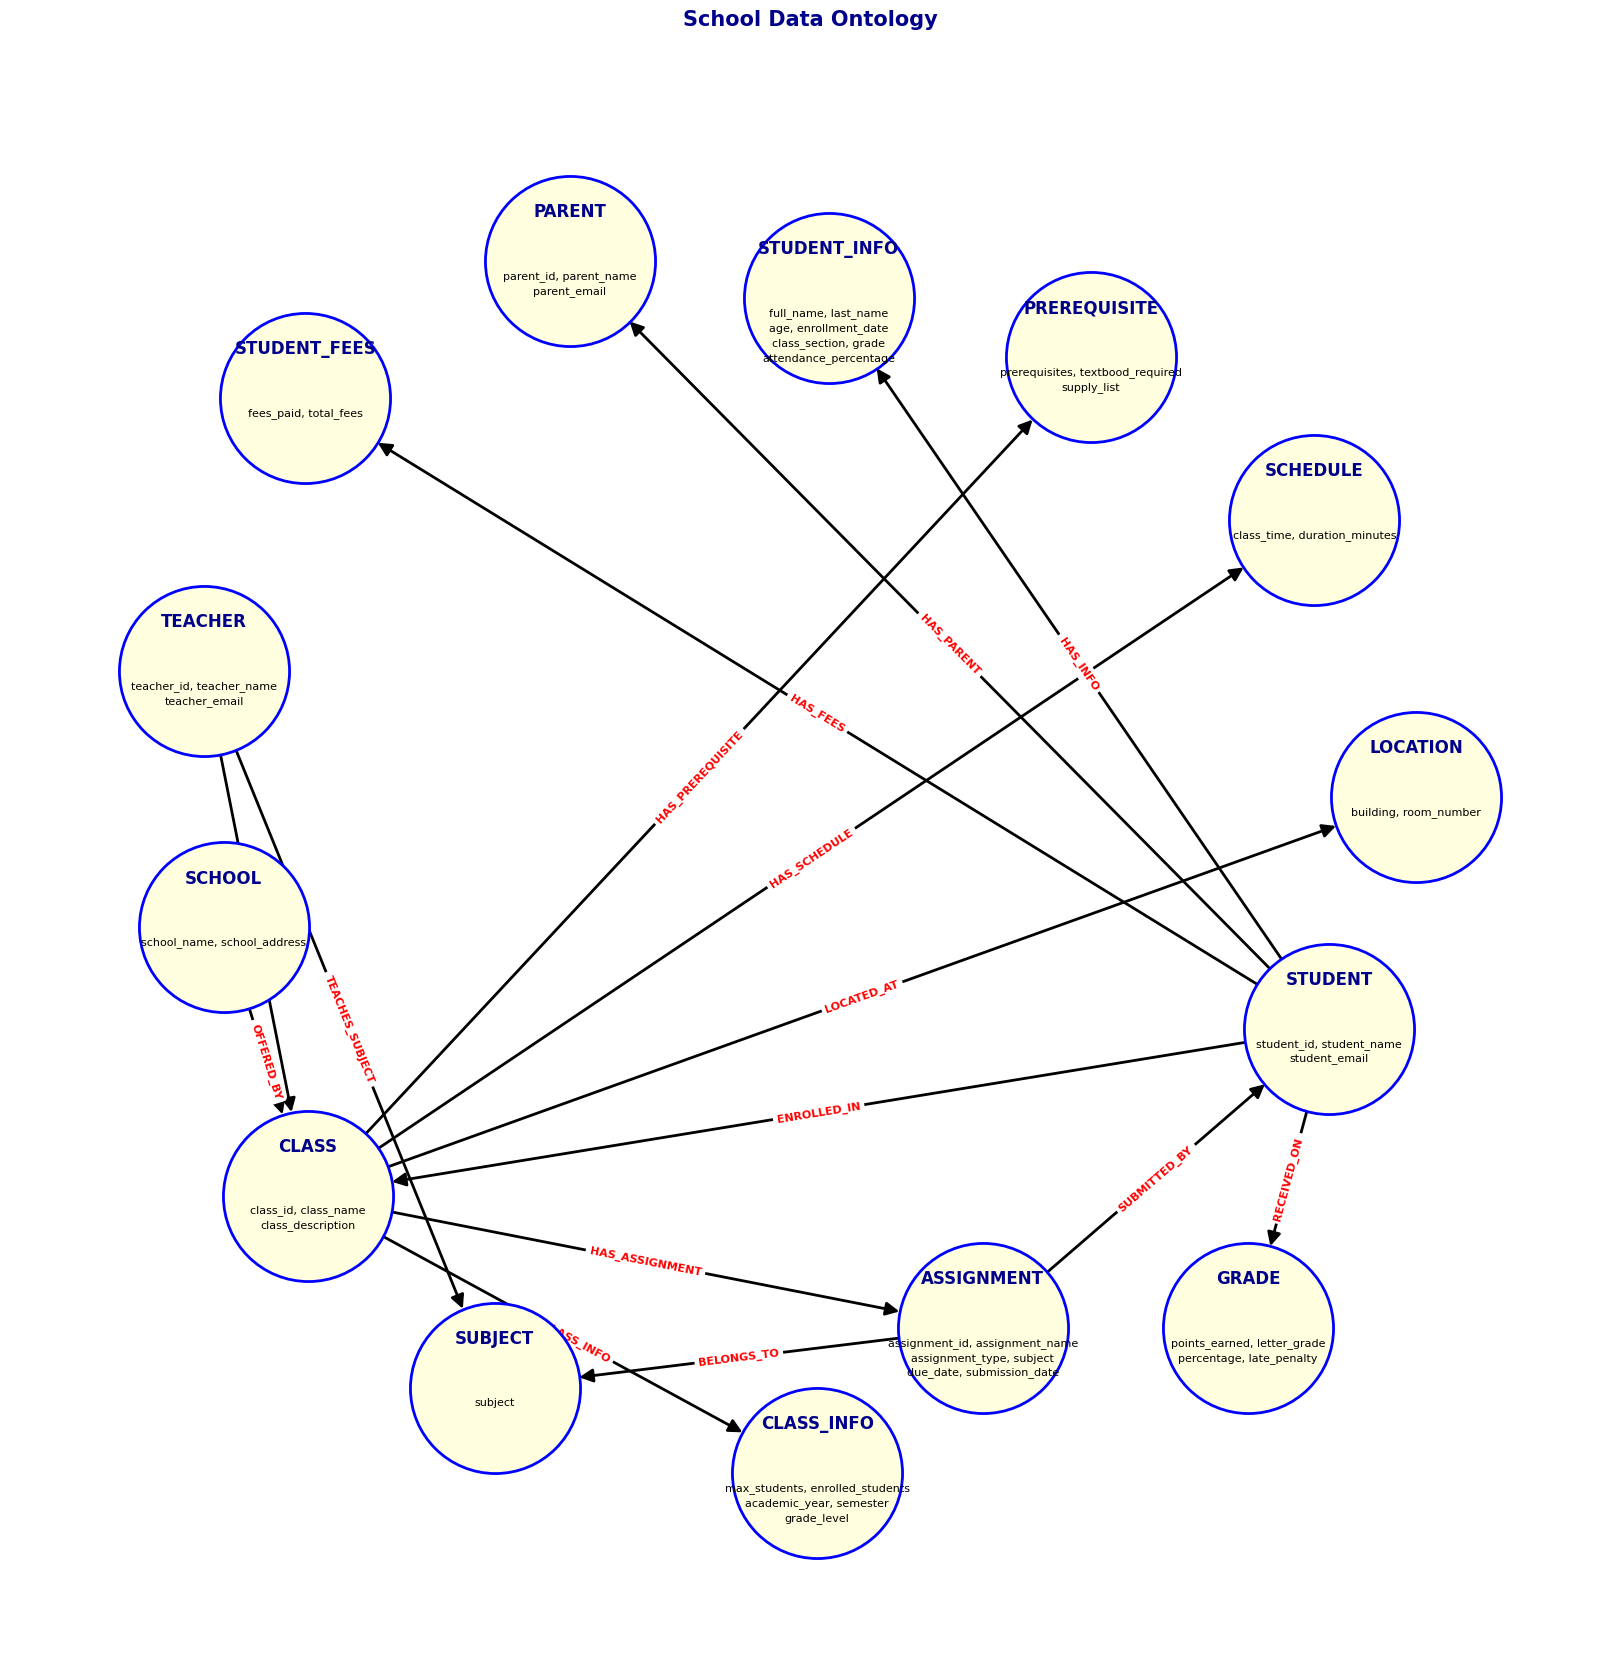

In [98]:


# Create figure with larger size for better visibility
plt.figure(figsize=(16, 16))

# Use a layout that spreads nodes out
pos = nx.spring_layout(G, k=4, iterations=50, seed=422)

# Draw the graph nodes with larger size
nx.draw(G, pos, with_labels=False, node_size=15000, 
        node_color='lightyellow', arrowsize=20, edge_color='black',
        node_shape='o', linewidths=2, edgecolors='blue', width=2)
# Get current axes
ax = plt.gca()

# Draw formatted node labels
for node, (x, y) in pos.items():
    node_attrs = G.nodes[node]
    node_name = node.upper()
    node_type = node_attrs['type']
    attributes = node_attrs.get('attributes', [])
    
    draw_formatted_node_label(ax, x, y, node_name, node_type, attributes)

# Draw the edge labels (relationships) with improved styling
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                           font_color='red', font_size=8, font_weight='bold', clip_on=False)

plt.title("School Data Ontology", size=15, fontweight='bold', pad=30, color='darkblue')

# Adjust the plot margins to prevent text cutoff
plt.margins(x=0.1, y=0.1)

# Remove axes for cleaner look
plt.axis('off')

# Add a subtle background
plt.gca().set_facecolor('#f8f9fa')

# Save the figure to a file
plt.savefig("school_ontology_advanced.png", format="PNG", dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


